In [1]:
#import juiste packages
import pandas as pd
import seaborn as sns

In [2]:
#lees data in
wine_dataframe = pd.read_csv('winequality-red.csv')

In [3]:
#eerste verkenning
wine_dataframe.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#eerste statistische verkenning
wine_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#check missende data
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


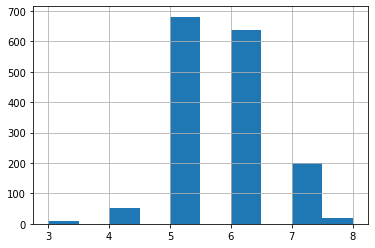

In [7]:
#vind distributie kwaliteit
wine_dataframe['quality'].hist()

#invloed op cut keuze 

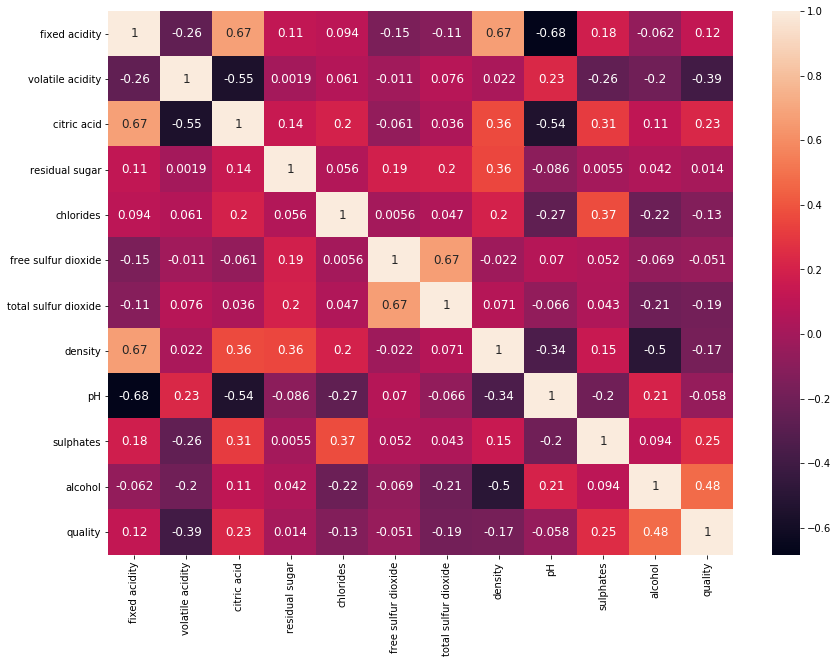

In [9]:
#vind correlatie
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(14, 10))
correlation_matrix = wine_dataframe.corr()
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size":12})
#sns.set(rc={'figure.figsize':(30,30),'font.size':30,'axes.labelsize':50})

plt.show()

#intuititive manier om voorspelkracht te zien

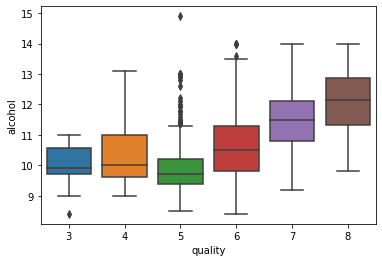

In [16]:
#vind outliers
sns.boxplot(x='quality',y='alcohol',data=wine_dataframe)

#keuze om data eruit te halen

## Preprocess 

In [17]:
#knip data in groepen
bins = (1,5,8.5)
group_names = ['slecht', 'goed']
wine_dataframe['quality'] = pd.cut(wine_dataframe['quality'], bins=bins, labels=group_names)

In [18]:
#check distributie
wine_dataframe['quality'].value_counts()

goed      855
slecht    744
Name: quality, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [25]:
#transform goed en slecht naar 0 en 1

label_quality = LabelEncoder()
wine_dataframe['quality'] = label_quality.fit_transform(wine_dataframe['quality'])

In [26]:
wine_dataframe['quality'].value_counts()

0    855
1    744
Name: quality, dtype: int64

In [27]:
#knip features en label los
X = wine_dataframe.drop('quality', axis=1)
Y = wine_dataframe['quality']

In [28]:
#scale features
sc = StandardScaler()
X = sc.fit_transform(X)

## Model 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
pred_dtc = dtc.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       208
           1       0.74      0.70      0.72       192

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [32]:
new = [[10,0.70,0,1.9,0.076,11,34,1,3,0.66,1]]

In [33]:
dtc.predict(new)

array([0])